IMPORTING LIBRARIES

In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Importing DataSet

In [31]:
f = pd.read_csv("/content/titanic.csv")

Creating a copy of data set so i can retrive the original data set when needed

In [32]:
df = f.copy()

Looking at the first 5 rows to know the details of it

In [33]:
df.head()
# df.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


DROPING THE COLUMNS WHICH DOESNT HAVE IMPACT ON SURVIVAL

In [35]:
df = df.drop(columns=["PassengerId","Name","Cabin","Ticket"])

Visualization to study the impact of each column and deduce important insights

In [36]:
df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr().style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [37]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

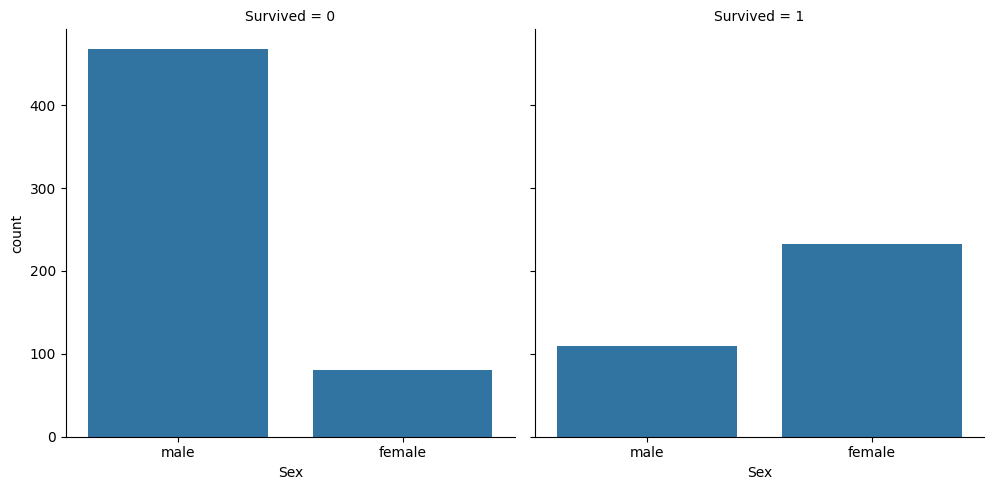

In [38]:
sns.catplot(data=df , x='Sex', col='Survived', kind='count')

Using FacetGrid to plot multiple features at once

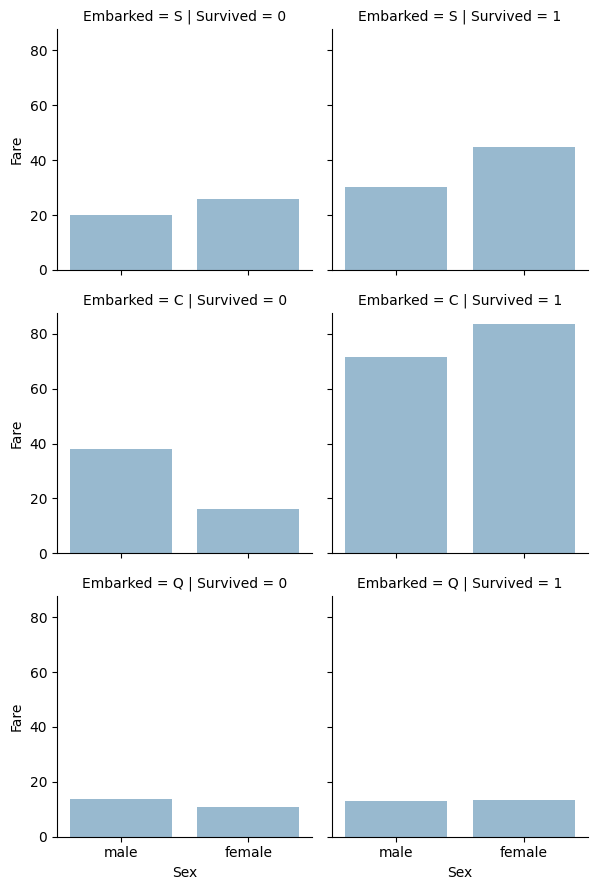

In [39]:
v= sns.FacetGrid(df, col='Survived', row='Embarked')
v.map(sns.barplot, 'Sex', 'Fare', alpha=0.5, ci=None)
v.add_legend()

Outlier Analysis with violin plot and box plot




In [40]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

<Axes: xlabel='Survived', ylabel='Age'>

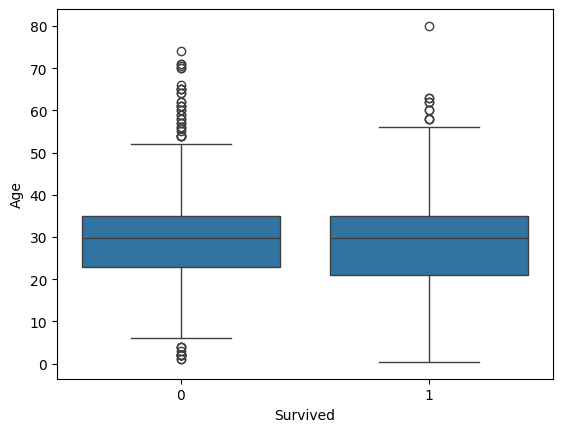

In [41]:
sns.boxplot( df, x='Survived', y='Age')


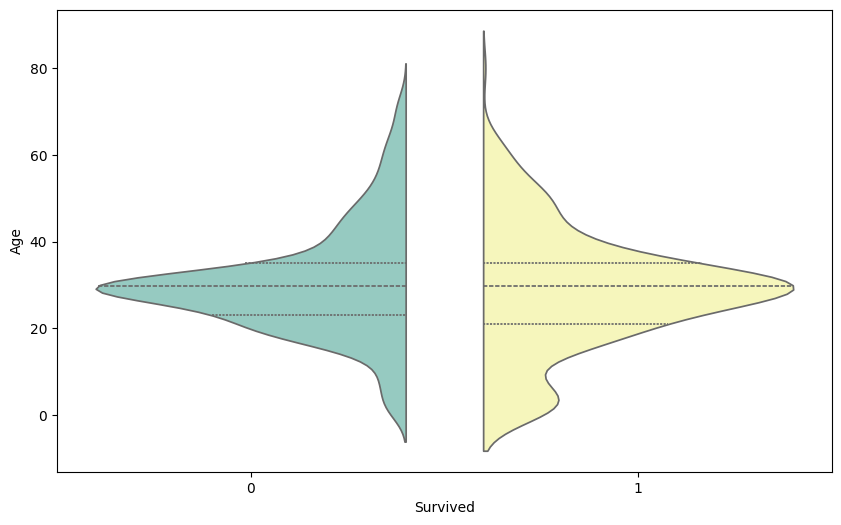

In [42]:
plt.figure(figsize=(10, 6))
sns.violinplot(df,x='Survived', y='Age', palette='Set3', split=True, inner='quartile')
plt.show()

In [43]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

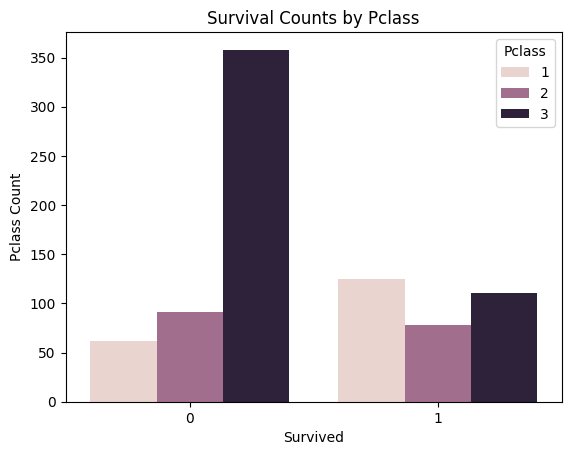

In [44]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Counts by Pclass')
plt.xlabel('Survived')
plt.ylabel('Pclass Count')
plt.show()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 825 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  825 non-null    int64  
 1   Pclass    825 non-null    int64  
 2   Sex       825 non-null    object 
 3   Age       825 non-null    float64
 4   SibSp     825 non-null    int64  
 5   Parch     825 non-null    int64  
 6   Fare      825 non-null    float64
 7   Embarked  824 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 58.0+ KB


Encoding the categorical data

In [46]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [47]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


Now that Data is cleaned and has been studied we can further go to split the data set and make a training and test set to make a model which can predict on future inputs

StandardScaling and splitting the data in test and train

In [48]:
X = df.drop(columns='Survived',axis=1)
Y = df['Survived']
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=43)

Making Rgression Models and finding there RMSE

In [50]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
reg = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'LinearRegression': LinearRegression(),
    'SVR': SVR(),
    'DecisionTree': DecisionTreeRegressor(random_state=42)
}

In [51]:
for key, r in reg.items():
    r.fit(X_train, Y_train)
    training_score = cross_val_score(r, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
    print(r.__class__.__name__, "has a training RMSE of", (-training_score.mean()) ** 0.5)

RandomForestRegressor has a training RMSE of 0.3689756040608724
GradientBoostingRegressor has a training RMSE of 0.3635226281789491
LinearRegression has a training RMSE of 0.3700426981311656
SVR has a training RMSE of 0.38305580223203467
DecisionTreeRegressor has a training RMSE of 0.4639072696145477


Making Classification Model and finding its accuracy

In [52]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

clf = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'SVC': SVC(probability=True),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}


In [53]:
for name, clf in clf.items():
    clf.fit(X_train, Y_train)
    training_score = cross_val_score(clf, X_train, Y_train, cv=5, scoring='accuracy')
    print(f"{name} has a training accuracy of {training_score.mean():.4f}")

RandomForest has a training accuracy of 0.8091
GradientBoosting has a training accuracy of 0.8227
AdaBoost has a training accuracy of 0.8136
XGBoost has a training accuracy of 0.8182
SVC has a training accuracy of 0.8273
DecisionTree has a training accuracy of 0.7970
KNN has a training accuracy of 0.8000


# Since Gradident Boisting had highest training accuraacy , we are futher going to improve it

Gradient Boosting Classifier ROC AUC: 0.8643


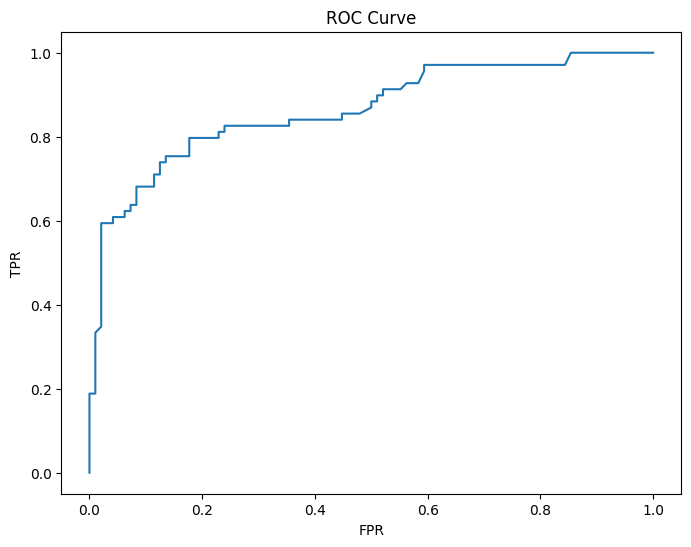

In [54]:

from sklearn.metrics import roc_auc_score, roc_curve

clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, Y_train)
y_proba = clf.predict_proba(x_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)
print(f"Gradient Boosting Classifier ROC AUC: {roc_auc:.4f}")
fpr, tpr,i = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()


Now Applying Grid Search and Hyperparameter tunning to getting better predictions on graidentboosting classifier

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4, 5]
}

clf = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, Y_train)

print(grid_search.best_params_)

best_clf = grid_search.best_estimator_

cv_score = cross_val_score(best_clf, X_train, Y_train, cv=5, scoring='roc_auc')
print(cv_score.mean())

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
0.8752151462994837


It increased accuracy to 87 percent from 83 .